In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import numpy.random as npr

### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [2]:
m = np.arange(12).reshape((3,4))
print(m)

#row means
for i in range(m.shape[0]):
    print ("Row", i, "mean:", np.mean(m[i,:]))
#column means
for i in range(m.shape[1]):
    print ("Column", i, "mean:", np.mean(m[:,i]))
#overall mean
print("Overall mean:",np.mean(m))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Row 0 mean: 1.5
Row 1 mean: 5.5
Row 2 mean: 9.5
Column 0 mean: 4.0
Column 1 mean: 5.0
Column 2 mean: 6.0
Column 3 mean: 7.0
Overall mean: 5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [3]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

#outer product with the function outer in numpy
print('Numpy outer function:', '\n', np.outer(u,v))

#outer product a nested for loop or list comprehension
print('List comprehension:', '\n', np.array([u[i]*v for i in range(v.shape[0])]))

#outer product with numpy broadcasting operations
print('Numpy broadcasting operations:', '\n', u.reshape(4,1)*(v.reshape(1,4)))

Numpy outer function: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
List comprehension: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Numpy broadcasting operations: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [4]:
np.random.seed(123)
m=np.random.random((10,6))
mask=(m<0.1)
zero=np.zeros(6)
for i in range(10):
    if np.any(mask,axis=1)[i]==True:
        m[i,:]=zero
print(m)

[[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646]
 [0.9807642  0.68482974 0.4809319  0.39211752 0.34317802 0.72904971]
 [0.         0.         0.         0.         0.         0.        ]
 [0.53155137 0.53182759 0.63440096 0.84943179 0.72445532 0.61102351]
 [0.72244338 0.32295891 0.36178866 0.22826323 0.29371405 0.63097612]
 [0.         0.         0.         0.         0.         0.        ]
 [0.42635131 0.89338916 0.94416002 0.50183668 0.62395295 0.1156184 ]
 [0.31728548 0.41482621 0.86630916 0.25045537 0.48303426 0.98555979]
 [0.51948512 0.61289453 0.12062867 0.8263408  0.60306013 0.54506801]
 [0.34276383 0.30412079 0.41702221 0.68130077 0.87545684 0.51042234]]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[0.57119866 1.20586385 1.84052903 2.47519421 3.10985939 3.74452458
 4.37918976 5.01385494 5.64852012 6.28318531]
[6.28318531 6.21971879 6.15625227 6.09278575 6.02931923 5.96585272
 5.9023862  5.83891968 5.77545316 5.71198664 5.64852012 5.58505361
 5.52158709 5.45812057 5.39465405 5.33118753 5.26772102 5.2042545
 5.14078798 5.07732146 5.01385494 4.95038842 4.88692191 4.82345539
 4.75998887 4.69652235 4.63305583 4.56958931 4.5061228  4.44265628
 4.37918976 4.31572324 4.25225672 4.1887902  4.12532369 4.06185717
 3.99839065 3.93492413 3.87145761 3.8079911  3.74452458 3.68105806
 3.61759154 3.55412502 3.4906585  3.42719199 3.36372547 3.30025895
 3.23679243 3.17332591 3.10985939 3.04639288 2.98292636 2.91945984
 2.85599332 2.7925268  2.72906028 2.66559377 2.60212725 2.53866073
 2.47519421 2.41172769 2.34826118 2.28479466 2.22132814 2.15786162
 2.0943951  2.03092858 1.96746207 1.90399555 1.84052903 1.77706251
 1.71359599 1.65012947 1.58666296 1.52319644 1.45972992 1.3962634
 1.33279688 1.2693

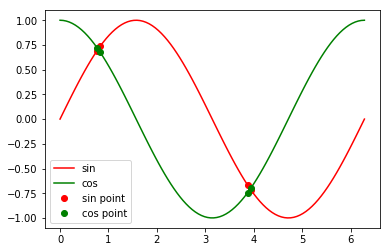

In [5]:
from math import pi
m=np.linspace(0,2*pi,100)

#extract every 10th element
print(m[9:100:10])
#reverse the array    
print(m[::-1])
#extract element ....
mask=(abs(np.sin(m)-np.cos(m))<0.1)
sincos=m[mask]
print(sincos)
#plot
plt.plot(m, np.sin(m), 'r', label='sin')
plt.plot(m, np.cos(m), 'g', label='cos')
plt.plot(sincos, np.sin(sincos), 'ro',label='sin point')
plt.plot(sincos, np.cos(sincos), 'go', label='cos point')
plt.legend()
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [6]:
molt=np.array([i*j for i in range(1,11) for j in range(1,11)]).reshape(10,10)
print('Multiplication table:', '\n',molt)

#extract anti-diagonal
anti_diag=([ molt[i,9-i] for i in range(10)])
print('Antidiagonal:',anti_diag)

#extract diagonal...
diag_off=np.diagonal(molt[:,1:10])
print('Diagonal offset by 1 upwards:',diag_off)

Multiplication table: 
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
Antidiagonal: [10, 18, 24, 28, 30, 30, 28, 24, 18, 10]
Diagonal offset by 1 upwards: [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [7]:
city=np.array(['*','Ch', 'Sp', 'SL', 'Tu', 'OC', 'Am', 'SF', 'Al', 'Fl', 'LA'])
km=np.array([0,198,303,736,871,1175,1475,1544,1913,2448])

dist=np.absolute(km.reshape(10,1)-km.reshape(1,10))

crosses_km=np.hstack((city.reshape(11,1),np.vstack((city[1:11].reshape(1,10),dist))))
print('Distance in km','\n',crosses_km)

crosses_miles=np.hstack((city.reshape(11,1),np.vstack((city[1:11].reshape(1,10),(dist*1.6).astype(int)))))
print('Distance in miles','\n',crosses_miles)

Distance in km 
 [['*' 'Ch' 'Sp' 'SL' 'Tu' 'OC' 'Am' 'SF' 'Al' 'Fl' 'LA']
 ['Ch' '0' '198' '303' '736' '871' '1175' '1475' '1544' '1913' '2448']
 ['Sp' '198' '0' '105' '538' '673' '977' '1277' '1346' '1715' '2250']
 ['SL' '303' '105' '0' '433' '568' '872' '1172' '1241' '1610' '2145']
 ['Tu' '736' '538' '433' '0' '135' '439' '739' '808' '1177' '1712']
 ['OC' '871' '673' '568' '135' '0' '304' '604' '673' '1042' '1577']
 ['Am' '1175' '977' '872' '439' '304' '0' '300' '369' '738' '1273']
 ['SF' '1475' '1277' '1172' '739' '604' '300' '0' '69' '438' '973']
 ['Al' '1544' '1346' '1241' '808' '673' '369' '69' '0' '369' '904']
 ['Fl' '1913' '1715' '1610' '1177' '1042' '738' '438' '369' '0' '535']
 ['LA' '2448' '2250' '2145' '1712' '1577' '1273' '973' '904' '535' '0']]
Distance in miles 
 [['*' 'Ch' 'Sp' 'SL' 'Tu' 'OC' 'Am' 'SF' 'Al' 'Fl' 'LA']
 ['Ch' '0' '316' '484' '1177' '1393' '1880' '2360' '2470' '3060' '3916']
 ['Sp' '316' '0' '168' '860' '1076' '1563' '2043' '2153' '2744' '3600']
 ['SL' '4

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

Prime numbers: [ 0  1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79
 83 89 97]


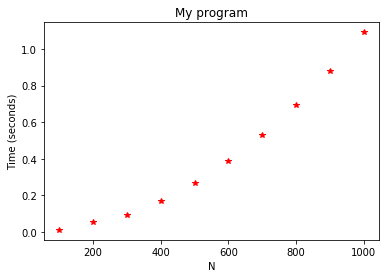

In [8]:
import time

def prime(N):
    mask=np.array([True for i in range(N)])
    numbers=np.arange(N)
    for i in range(2,N):
        for j in range(2,N):
            #if numbers[j]%numbers[j]==0 -> it is not prime
            if numbers[i]!=numbers[j] and numbers[i]%numbers[j]==0: mask[i]=False             
    return numbers[mask]

print("Prime numbers:",prime(100))

#tim
timeres=np.zeros((10,2))
j=0
for i in range(10,110,10):
    start_time = time.process_time()
    prime(10*i)
    timeres[j,0]=i*10
    timeres[j,1]=time.process_time() - start_time
    j +=1
 
plt.plot(timeres[:,0], timeres[:,1], 'r*')
plt.xlabel('N')
plt.ylabel('Time (seconds)')
plt.title('My program')
plt.show()

[ 0  1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79
 83 89 97]


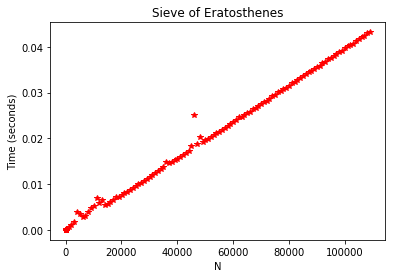

In [13]:
def Erat(N):
    mask=np.array([True for i in range(N)])
    numbers=np.arange(N)
    for i in range(2,int(sqrt(N))):
        if mask[i] == True: 
            for j in range(i**2, N, i):
                mask[j]=False      
    prime=numbers[mask]
    return prime                

print(Erat(100))

#time
timeres=np.zeros((1000,2))
j=0
for i in range(10,11000,100):
    start_time = time.process_time()
    Erat(10*i)
    timeres[j,0]=i*10
    timeres[j,1]=time.process_time() - start_time
    j +=1
    
plt.plot(timeres[:,0], timeres[:,1], 'r*')
plt.xlabel('N')
plt.ylabel('Time (seconds)')
plt.title('Sieve of Eratosthenes')
plt.show()

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

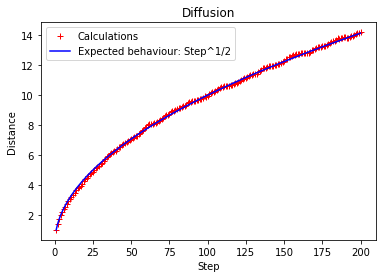

In [10]:
npr.seed(123)
steps=npr.randint(0,2,size=(1000,200)) #2D array with 0 1
steps=steps*2-1 # 0 -> -1

distance=steps
for i in range(1,200):
    distance[:,i]=distance[:,i-1:i+1].sum(axis=1) #compute the distance

mean=np.hstack((1+np.arange(200).reshape(200,1),np.mean(distance**2, axis=0).reshape(200,1))) #calcolo la media del quadrato della distanza
plt.plot(mean[:,0], np.sqrt(mean[:,1]), 'r+', label='Calculations')
plt.plot(mean[:,0], np.sqrt(mean[:,0]), 'b', label='Expected behaviour: Step^1/2')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.title('Diffusion')
plt.legend()
plt.show()

Yes, I obtained the expected behaviour as shown in the plot.

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

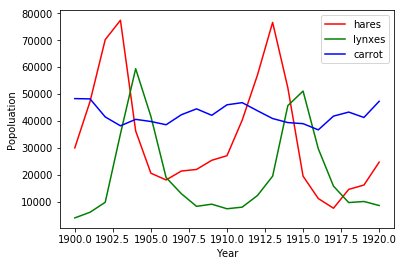

hares
mean 34080.95238095238
std 20897.906458089667
median 25400.0
min 7600.0
max 77400.0

 lynxes
mean 20166.666666666668
std 16254.591536908763
median 12300.0
min 4000.0
max 59400.0

 carrots
mean 42400.0
std 3322.5062255844787
median 41800.0
min 36700.0
max 48300.0

 corrcoef: hares lynxes 
 [[1.         0.07189206]
 [0.07189206 1.        ]] 

corrcoef: hares carrots 
 [[ 1.         -0.01660378]
 [-0.01660378  1.        ]] 

corrcoef: carrots lynxes 
 [[ 1.         -0.68057717]
 [-0.68057717  1.        ]] 



In [11]:
file_name = "populations.txt"
data=np.loadtxt(file_name) #read the file and put the data in array2D

years=data[:,0]
hares=data[:,1]
lynxes=data[:,2]
carrots=data[:,3]

plt.plot(years, hares, 'r', label='hares')
plt.plot(years, lynxes, 'g', label='lynxes')
plt.plot(years, carrots, 'b', label='carrot')
plt.xlabel('Year')
plt.ylabel('Popoluation')
plt.legend()
plt.show()

print('hares')
for function in ['mean', 'std', 'median', 'min', 'max']:
    print(function, getattr(np, function)(hares))
print('\n','lynxes')
for function in ['mean', 'std','median', 'min', 'max']:
    print(function, getattr(np, function)(lynxes))
print('\n','carrots')
for function in ['mean', 'std','median','min', 'max']:
    print(function, getattr(np, function)(carrots))
    

print('\n','corrcoef: hares lynxes', '\n',  getattr(np, 'corrcoef')(hares,lynxes),'\n')
print('corrcoef: hares carrots', '\n',  getattr(np, 'corrcoef')(hares,carrots),'\n')
print('corrcoef: carrots lynxes', '\n',  getattr(np, 'corrcoef')(carrots,lynxes),'\n',)

There is a correlation between lynxe and hare populations and this behaviour it explained by the Lynx-SnowshoeHare cycle.